# **Hearth failure prediction proyect**

## Objectives

* Fetch a Dataset from Kaggle, save as raw Data, extract, clean analyse and save said data as clean 
## Inputs

* Heart Failure Prediction Dataset

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\organ\\Desktop\\Code institute\\python\\test2-code-institute\\Hearth_Proyect\\Heart_Failure_Prediction_Proyect\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\organ\\Desktop\\Code institute\\python\\test2-code-institute\\Hearth_Proyect\\Heart_Failure_Prediction_Proyect'

# Configure the enviroment, charge the data Raw and import Libraries

Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Charge Raw Data

In [5]:
file_path = "C:\\Users\\organ\\Desktop\\Code institute\\python\\test2-code-institute\\Hearth_Proyect\\Heart_Failure_Prediction_Proyect\\Dataset\\Raw\\Heart_prediction.csv"
df = pd.read_csv(file_path)
print(df.head(5))
print(df.dtypes) #check the data types of the columns


   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  
Age                        int64
Gender                     int64
BloodPressure              int64
Cholesterol                int64
HeartRate                  int64
QuantumPatternFeature    float64
HeartDisease               int64
dtype: object


# Clean and Transform Data (ETL)

Clean the Data

In [ ]:
#check for null values
df = df.dropna() #drop any rows with null values if any
df.isnull().sum() #0 null values in all columns
#check for duplicates
df = df.drop_duplicates() #remove duplicates if any
df.duplicated().sum() #0 duplicates



0

Convert Data

there is no need in this dataset to change categorical to numerical, but if needed we can change it so

In [9]:
#df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0}).astype("Int64") #convert categorical to numerical
print(df.dtypes) #check the data types of the columns

Age                        int64
Gender                     int64
BloodPressure              int64
Cholesterol                int64
HeartRate                  int64
QuantumPatternFeature    float64
HeartDisease               int64
dtype: object


---

# Save clean data on a File

Section 2 content

In [10]:
df.to_csv("Dataset/Cleaned/clean_Heart_data.csv", index = False) #save the cleaned data to a new csv file
df = pd.read_csv("Dataset/Cleaned/clean_Heart_data.csv") #read the cleaned data
print(df.head(5)) #show the first 5 rows of the cleaned data

   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  


# Data Visualisation

<Axes: >

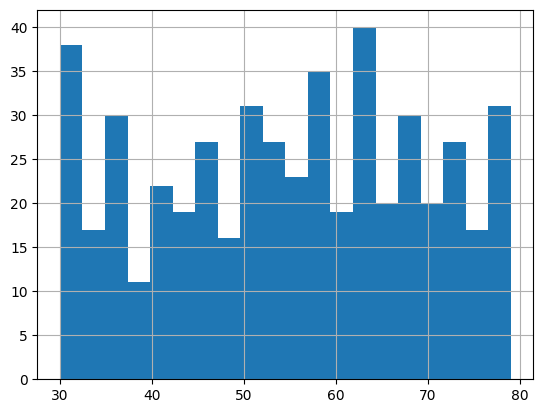

In [11]:
df.describe() #show the statistics of the cleaned data
df['Age'].hist(bins=20) #show the histogram of the Age column

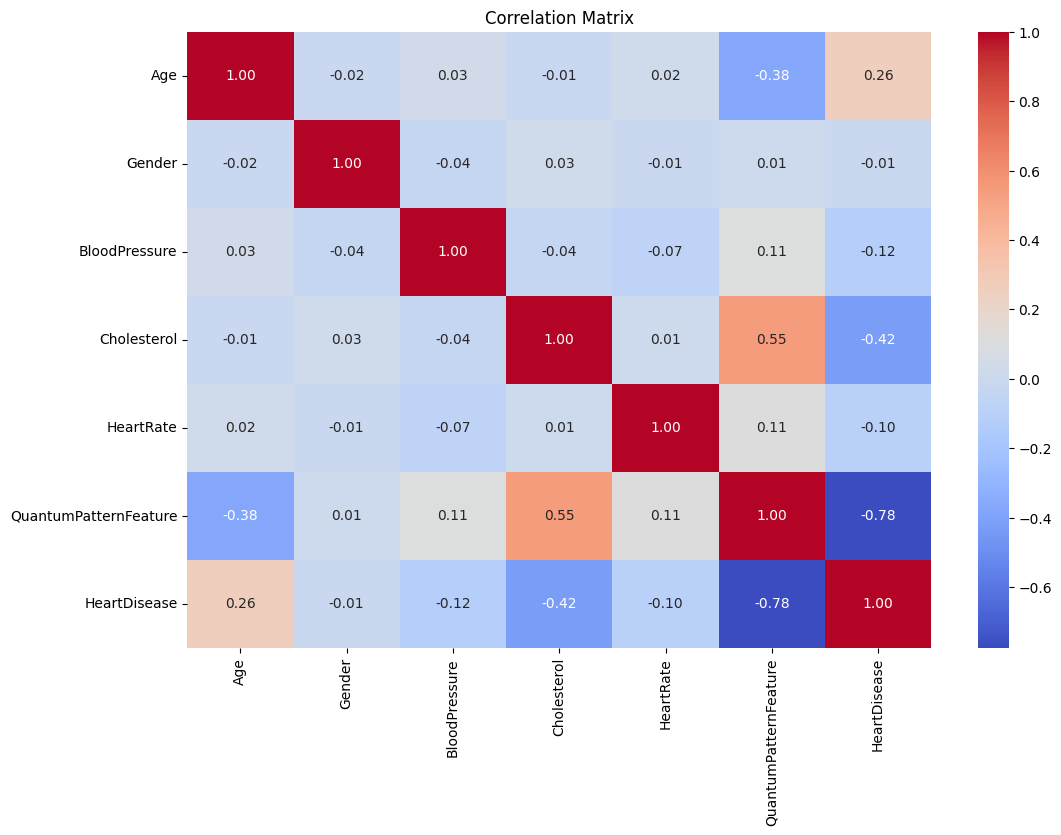

In [12]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

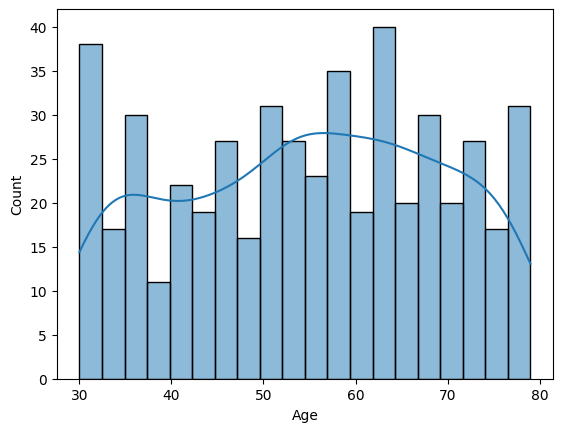

In [13]:
sns.histplot(df['Age'], bins=20, kde=True)

<Axes: xlabel='Gender', ylabel='Count'>

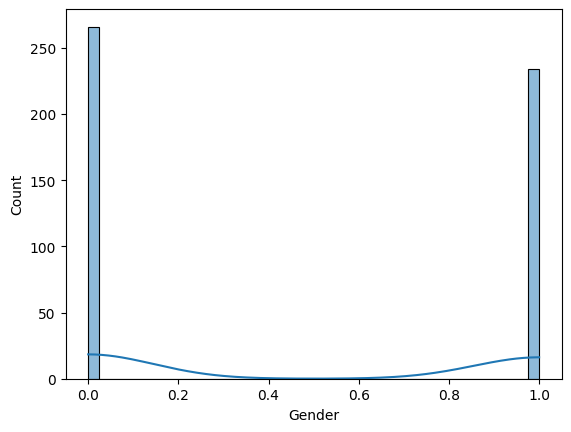

In [15]:
sns.histplot(df['Gender'], bins=40, kde=True)

<Axes: xlabel='Cholesterol', ylabel='Count'>

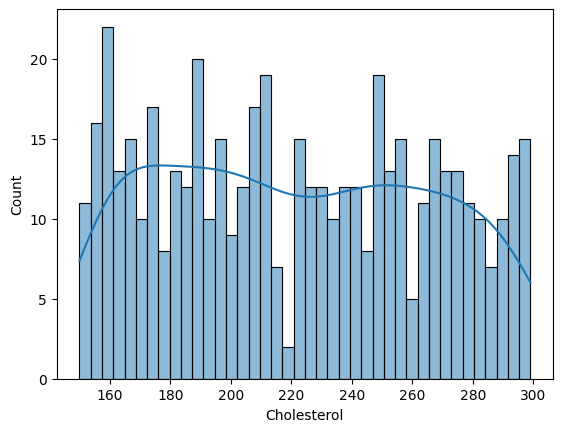

In [18]:
sns.histplot(df['Cholesterol'], bins=40, kde=True)

<Axes: xlabel='HeartDisease', ylabel='Count'>

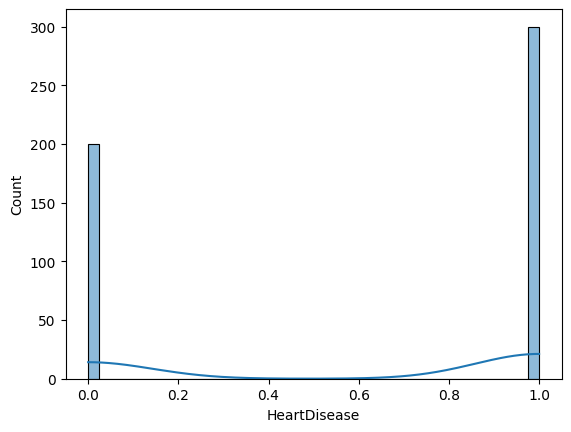

In [20]:
sns.histplot(df['HeartDisease'], bins=40, kde=True)

<Axes: xlabel='HeartRate', ylabel='Count'>

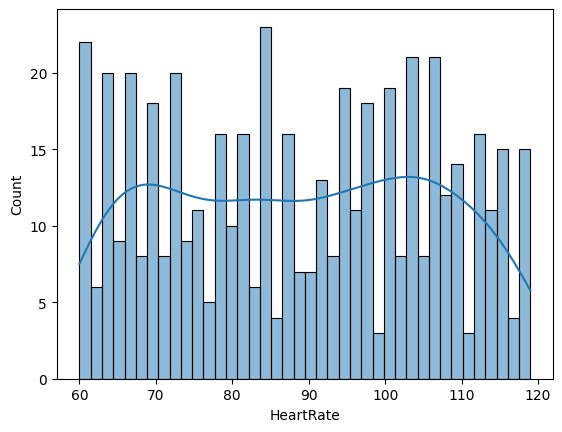

In [21]:
sns.histplot(df['HeartRate'], bins=40, kde=True)

Heartdisease and Cholesterol distribution

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

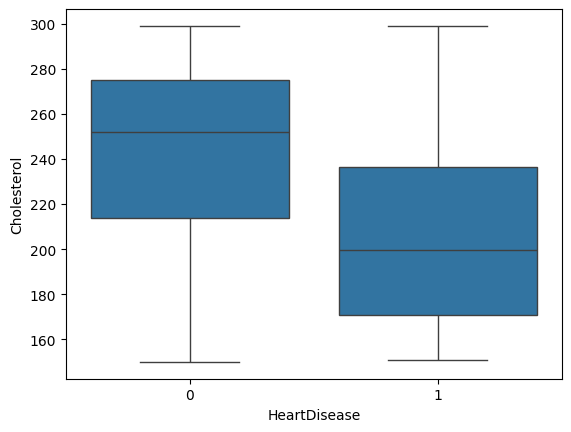

In [22]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)


<Axes: xlabel='HeartDisease', ylabel='BloodPressure'>

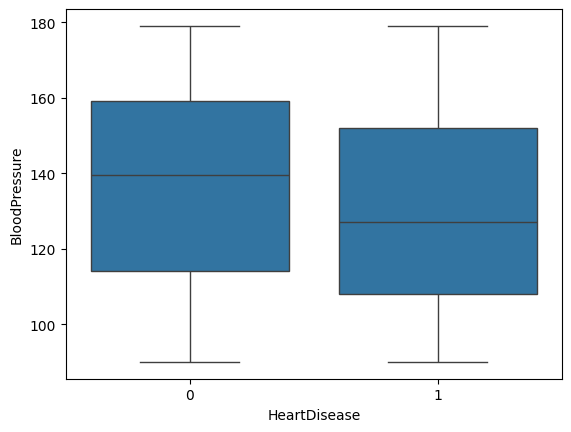

In [24]:
sns.boxplot(x='HeartDisease', y='BloodPressure', data=df)


Age distribution per Heart disease

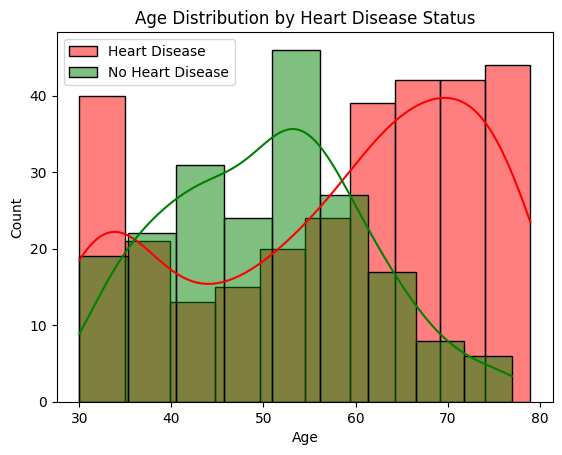

In [30]:
sns.histplot(df[df['HeartDisease'] == 1]['Age'], kde=True, color='red', label='Heart Disease')
sns.histplot(df[df['HeartDisease'] == 0]['Age'], kde=True, color='green', label='No Heart Disease')
plt.legend()
plt.title('Age Distribution by Heart Disease Status')
plt.show()

<Axes: xlabel='HeartRate', ylabel='Cholesterol'>

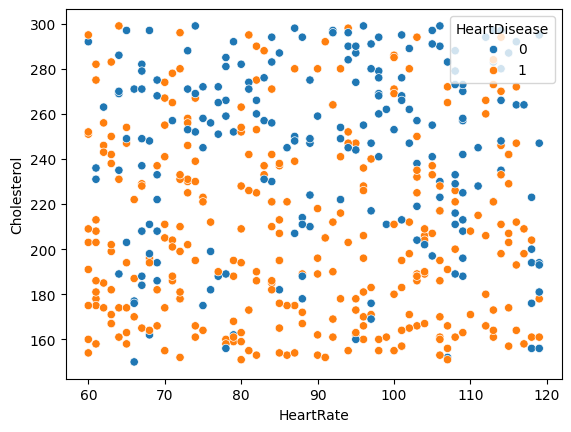

In [31]:
sns.scatterplot(x='HeartRate', y='Cholesterol', hue='HeartDisease', data=df)


<Axes: xlabel='Gender', ylabel='HeartDisease'>

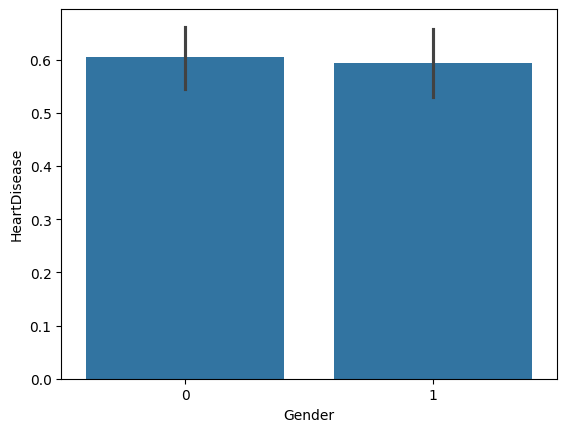

In [32]:
sns.barplot(x='Gender', y='HeartDisease', data=df)


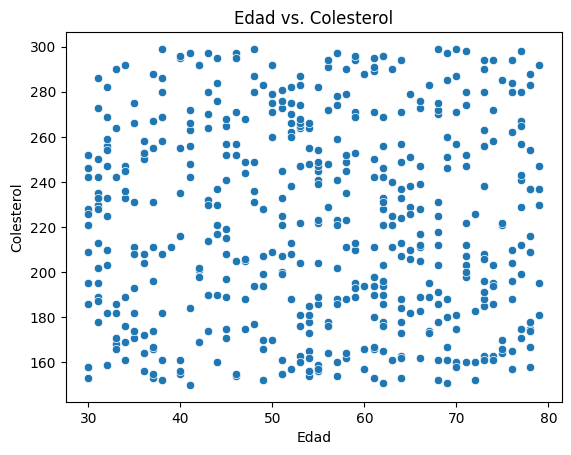

In [ ]:
sns.scatterplot(x='Age', y='Cholesterol', data=df)
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


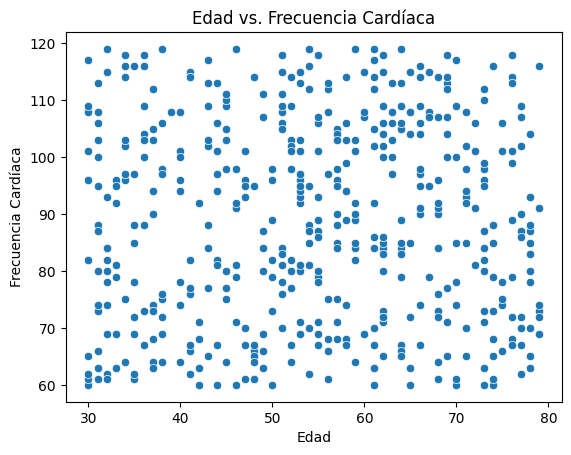

In [ ]:
sns.scatterplot(x='Age', y='HeartRate', data=df)
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()


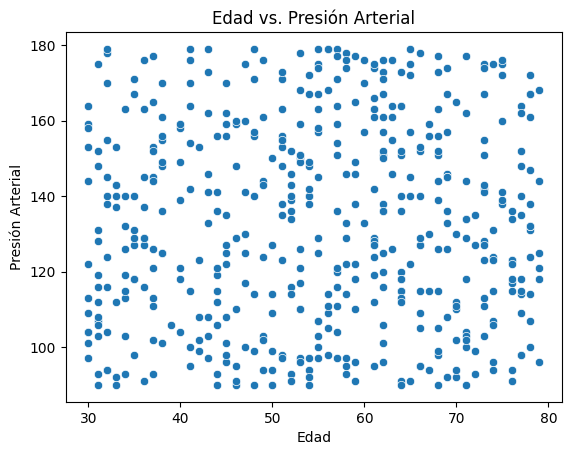

In [ ]:
sns.scatterplot(x='Age', y='BloodPressure', data=df)
plt.title('Age vs. Arterial Pressure')
plt.xlabel('Age')
plt.ylabel('Arterial Pressure')
plt.show()


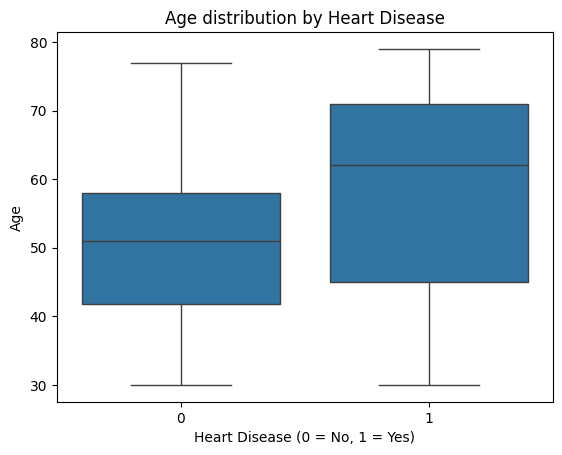

In [ ]:
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()



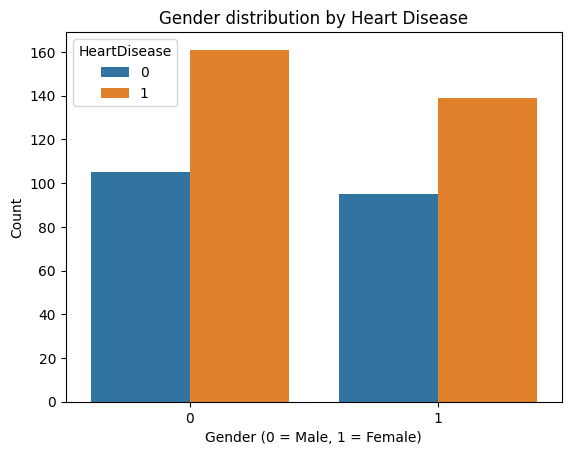

In [47]:
sns.countplot(x="Gender", hue="HeartDisease", data=df)
plt.title("Gender distribution by Heart Disease")
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
